In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score


Part 1: Data Exploration

In [160]:
# a) Import bike_share_hour.csv as a Pandas DataFrame with the following code: 
url = 'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv' 
df = pd.read_csv(url) 
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [161]:
# b) Identify and print the number of unique date labels (dteday) 
unique_dates = df['dteday'].nunique()
print(f"\nNumber of unique date labels: {unique_dates}")

# Check the years present in the data
years = pd.to_datetime(df['dteday']).dt.year.unique()
print(f"Years present in the data: {years}")




Number of unique date labels: 731
Years present in the data: [2011 2012]


The dataset contains 731 unique date labels. 2011 and 2012 together would have 365 + 366 = 731 days (2012 was a leap year). This confirms that the dataset indeed covers exactly two calendar years as claimed in the README file.

In [ ]:
# c) Missing data
print(df['dteday'].value_counts())
print(df['dteday'].value_counts().value_counts())
# The hourly data that is missing from the incomplete dates represents the hours that cnt is equal to zero.

dteday
2012-12-31    24
2011-01-01    24
2012-12-30    24
2012-12-29    24
2012-12-28    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64
count
24    655
23     62
22      6
18      2
17      1
16      1
12      1
11      1
8       1
1       1
Name: count, dtype: int64


In [163]:
# d) Remove the dteday and instant input features
df.drop(columns=['instant', 'dteday'], inplace=True)

In [164]:
# e) Identify and convert categorical features to Pandas category type
print("\nDataFrame info before conversion:")
df.info()

# Examining data types and descriptions
print("\nDescriptive statistics of the dataset:")
print(df.describe())



DataFrame info before conversion:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB

Descriptive statistics of the dataset:
             season            yr          mnth            hr       holiday  \
count  17379.000000  173

In [ ]:
# f) Convert the 8 categorical features to category type
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

print("\nDataFrame info after conversion to category type:")
df.info()


DataFrame info after conversion to category type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


In [166]:
# g) Calculate and handle null values
null_values = df.isnull().sum()
print("\nNull values in each column:")
print(null_values)

# Remove rows with null values if any
df = df.dropna()
print(f"\nShape after dropping null values: {df.shape}")



Null values in each column:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Shape after dropping null values: (17379, 15)


In [167]:
# h) Map and display the values in month to the values in season

month_to_season = df.groupby('mnth')['season'].unique()
print(month_to_season)

mnth
1        [1]
Categories (4, int64): [1, 2, 3, 4]
2        [1]
Categories (4, int64): [1, 2, 3, 4]
3     [1, 2]
Categories (4, int64): [1, 2, 3, 4]
4        [2]
Categories (4, int64): [1, 2, 3, 4]
5        [2]
Categories (4, int64): [1, 2, 3, 4]
6     [2, 3]
Categories (4, int64): [1, 2, 3, 4]
7        [3]
Categories (4, int64): [1, 2, 3, 4]
8        [3]
Categories (4, int64): [1, 2, 3, 4]
9     [3, 4]
Categories (4, int64): [1, 2, 3, 4]
10       [4]
Categories (4, int64): [1, 2, 3, 4]
11       [4]
Categories (4, int64): [1, 2, 3, 4]
12    [4, 1]
Categories (4, int64): [1, 2, 3, 4]
Name: season, dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_19700\3729581684.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_to_season = df.groupby('mnth')['season'].unique()


The mapping overlaps showing that one month could have two seasons say part of month three is in winter and part of it is in spring.

In [168]:

# i) Descriptive statistics of numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


Temperature (temp) and normalized temperature (atemp) range from 0.02 to 1.00, being normalized values.
Humidity (hum) ranges from 0.0 to 1.0, representing relative humidity.
Windspeed (windspeed) also ranges from 0.0 to 0.85, being normalized.
The target variable (cnt) has a minimum value of 1, confirming the dataset only includes hours with at least one bike rental.

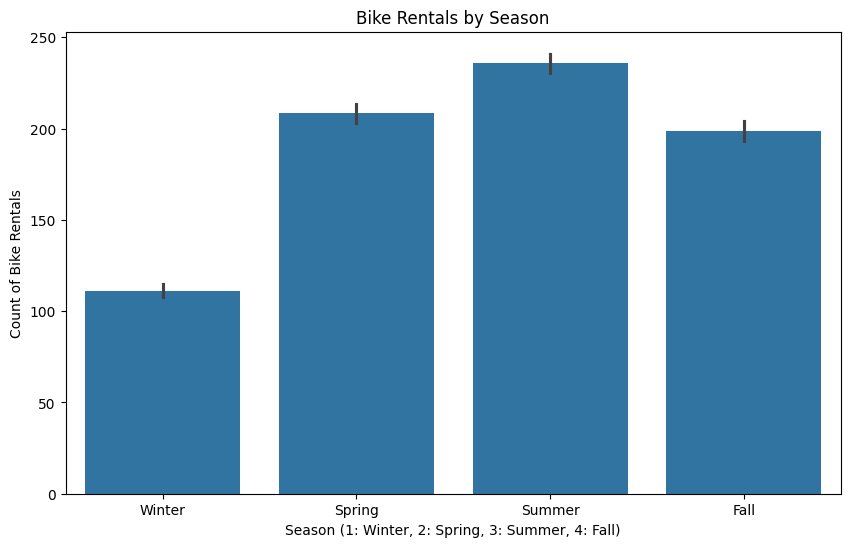

In [169]:
# j) Construct a bar plot of cnt versus season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('Count of Bike Rentals')
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

Bike usage is highest in summer and lowest in winter, which aligns with intuition, as people are more likely to rent bikes in warmer weather.



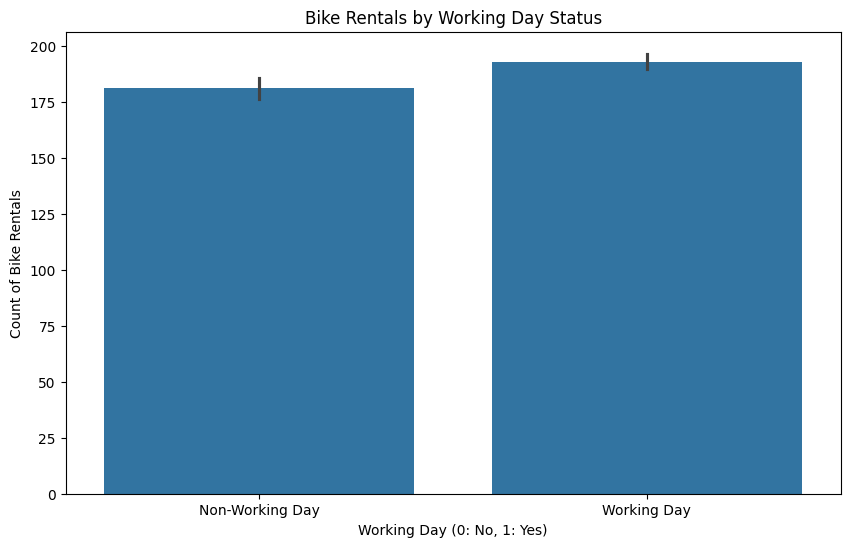

In [170]:
# k) Construct a bar chart of cnt versus workingday
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=df)
plt.title('Bike Rentals by Working Day Status')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Count of Bike Rentals')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.show()

The analysis shows that the number of bike rentals is fairly similar between working days and non-working days, with a slightly higher average on working days. The mean is a better representation here since it normalizes for the different number of days.

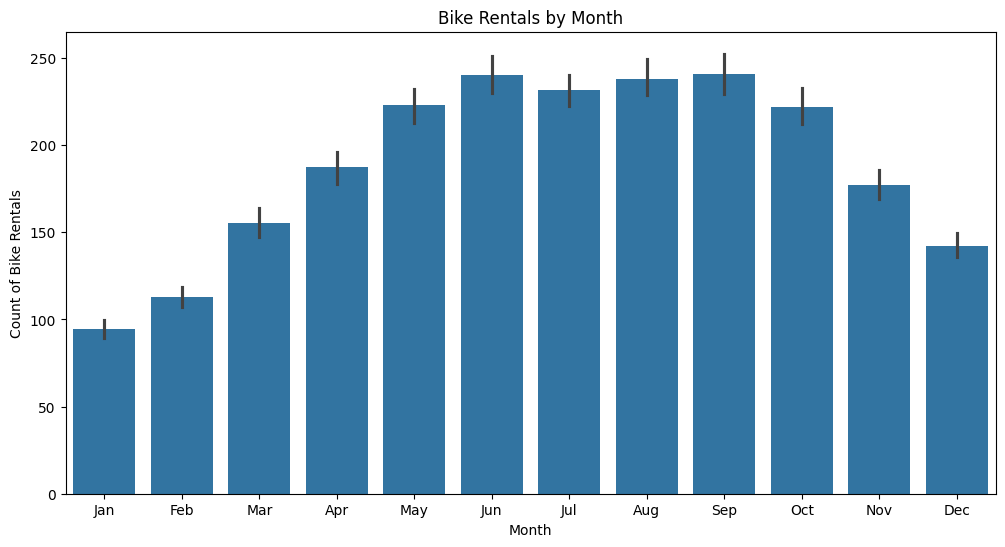

In [171]:
# l) Construct a bar chart for cnt versus mnth
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=df)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Rentals')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

The monthly pattern shows higher bike usage during the warmer months (May through October). This aligns with intuition and the seasonal patterns observed earlier, confirming that weather plays a significant role in bike rental behavior.

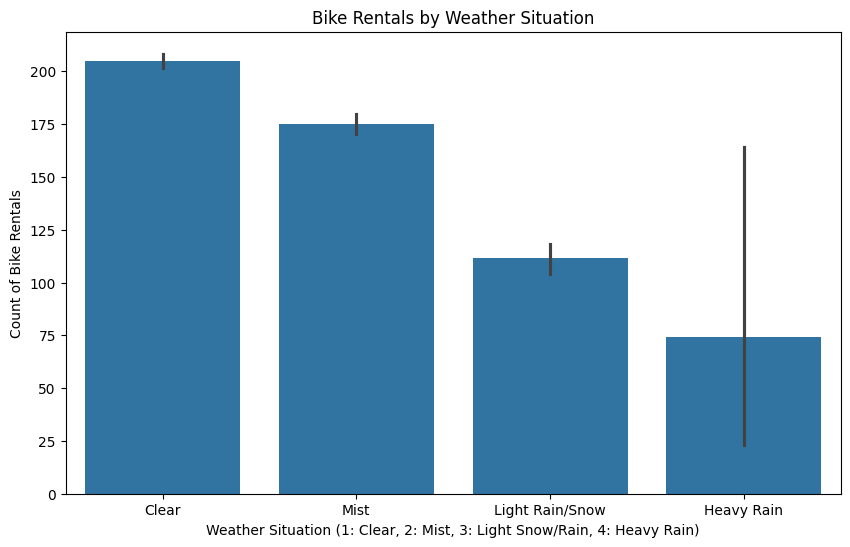

In [172]:
# m) Construct a bar plot of cnt versus weathersit
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain)')
plt.ylabel('Count of Bike Rentals')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain'])
plt.show()

The bar plot shows that bike rentals decrease significantly as weather conditions worsen.

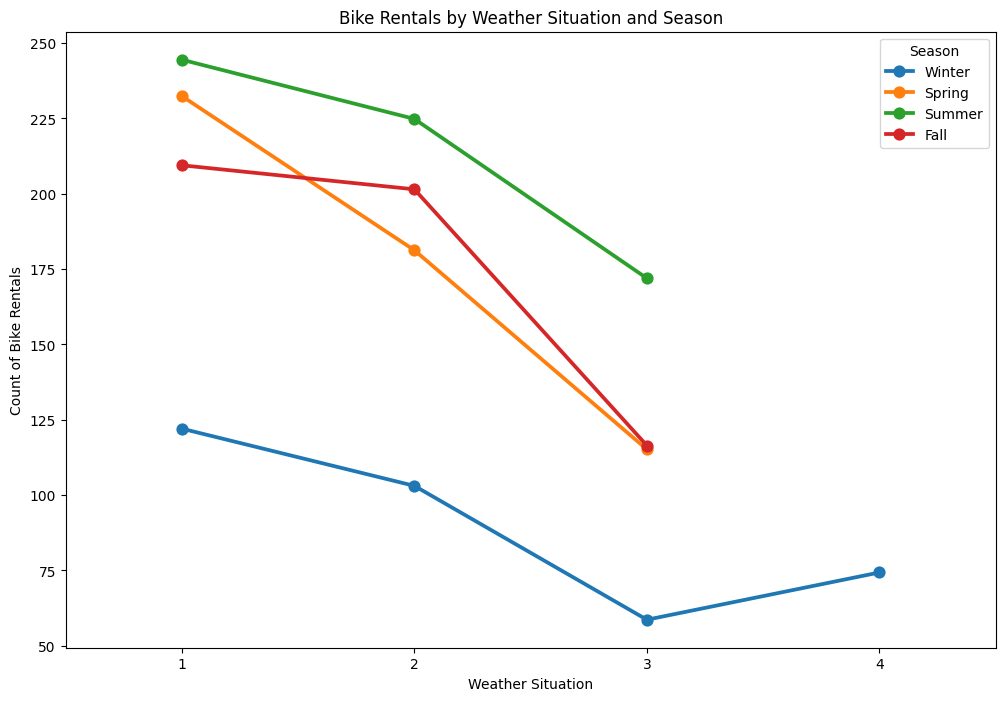

In [173]:
# n) Construct a point plot of weathersit vs cnt with season as hue
plt.figure(figsize=(12, 8))
sns.pointplot(x='weathersit', y='cnt', hue='season', data=df, errorbar=None)
plt.title('Bike Rentals by Weather Situation and Season')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Bike Rentals')
plt.legend(title='Season', labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

In all seasons, clear weather (1) has higher rental counts than misty (2) or rainy (3) weather
The impact of poor weather is less severe in summer and fall compared to winter and spring

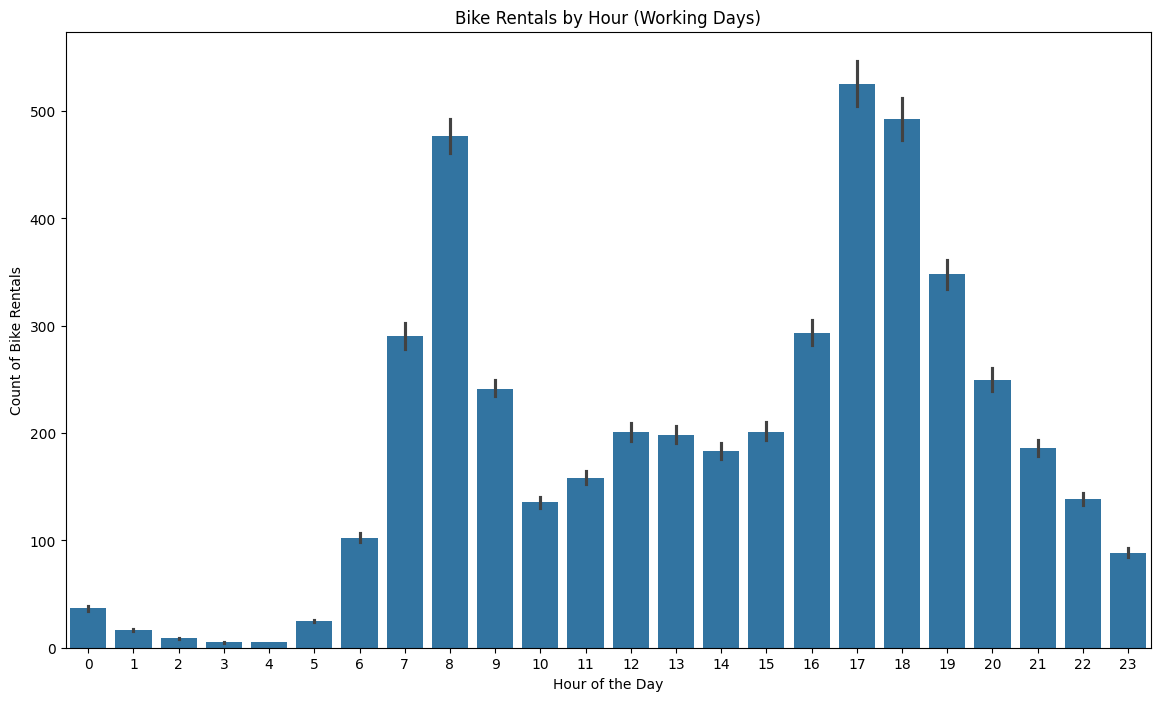

In [174]:
# o) Construct a bar plot of cnt versus hr for workingday = 1
plt.figure(figsize=(14, 8))
working_day_data = df[df['workingday'] == 1]
sns.barplot(x='hr', y='cnt', data=working_day_data)
plt.title('Bike Rentals by Hour (Working Days)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Bike Rentals')
plt.xticks(range(24))
plt.show()

A morning peak around 8 AM, corresponding to the morning commute
An evening peak around 5-6 PM, corresponding to the evening commute
This pattern strongly indicates that bike rentals on working days are heavily influenced by commuting patterns.

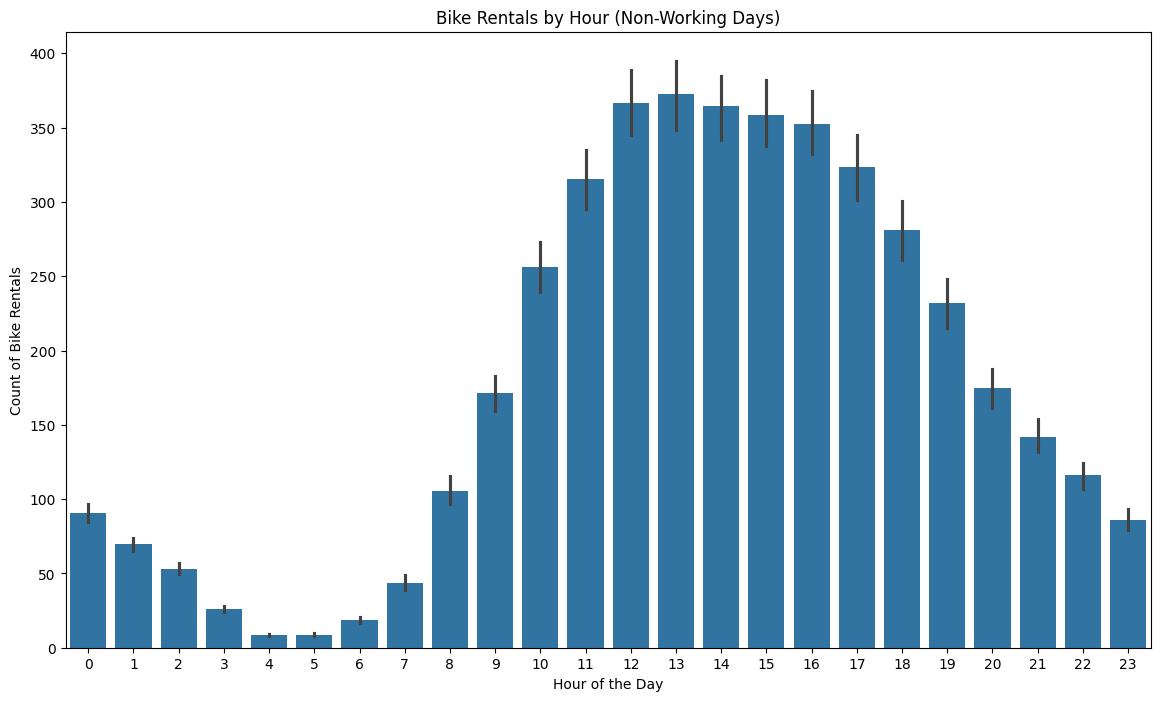

In [175]:
# p) Construct a bar plot of cnt versus hr for workingday = 0
plt.figure(figsize=(14, 8))
non_working_day_data = df[df['workingday'] == 0]
sns.barplot(x='hr', y='cnt', data=non_working_day_data)
plt.title('Bike Rentals by Hour (Non-Working Days)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Bike Rentals')
plt.xticks(range(24))
plt.show()

No pronounced commuting peaks
A gradual increase throughout the morning
Peak usage in the mid-afternoon (around 1-3 PM)
Gradual decline in the evening
This pattern suggests recreational use rather than commuting, which aligns with intuition about weekend/holiday activities.

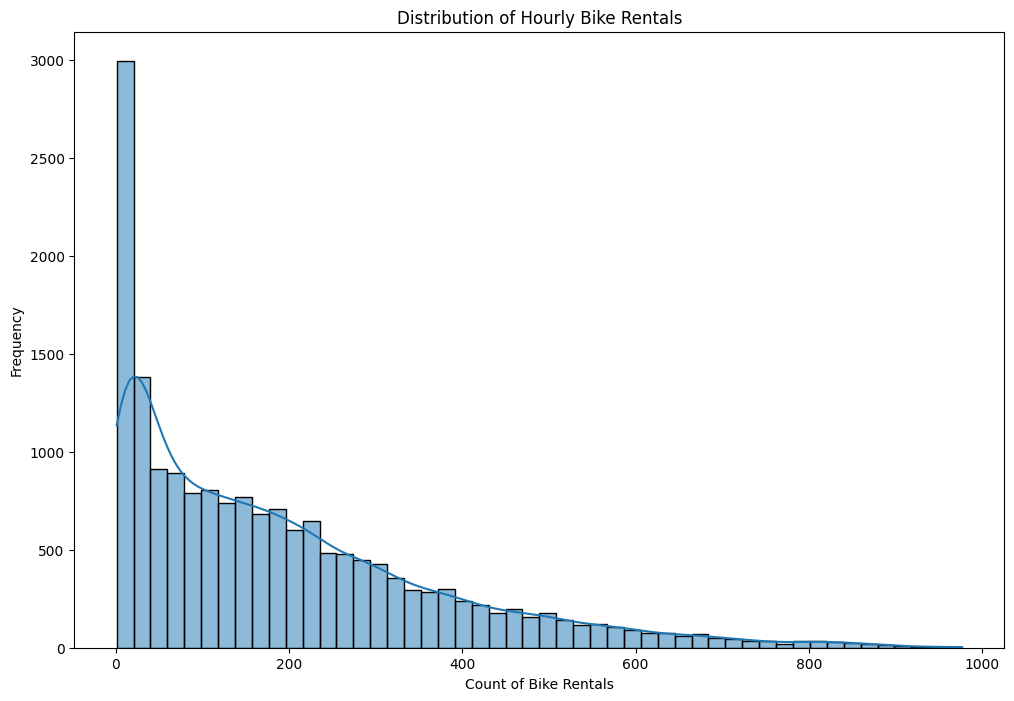

In [176]:
# q) Construct a histogram of the cnt column
plt.figure(figsize=(12, 8))
sns.histplot(df['cnt'], kde=True, bins=50)
plt.title('Distribution of Hourly Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

The histogram of the 'cnt' column shows a right-skewed distribution, with most hours having relatively low rental counts (below 200) and fewer hours with very high rental counts. The distribution has a long tail extending to over 800 rentals per hour in extreme cases. This skewed distribution suggests that certain combinations of conditions (likely good weather during peak hours) create especially high demand for bike rentals.

Part 2: Data Preparation 

In [177]:
# a) Calculate correlation values for all columns
correlation_matrix = df.corr()
print(correlation_matrix)

              season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
casual      0.120206  0.142779  0.0684

Strong positive correlation between 'season' and 'month',
Strong positive correlation between 'temp' and 'atemp', 
Strong positive correlations between 'casual', 'registered', and 'cnt' which is expected since 'cnt' is the sum of 'casual' and 'registered'
Moderate positive correlation between 'temp' and 'cnt',indicating higher temperatures are associated with more bike rentals
Moderate positive correlation between 'yr' and 'cnt' suggesting an increase in bike usage from 2011 to 2012

In [178]:
# b) Drop highly correlated features
df.drop(columns=['casual', 'registered', 'atemp'], inplace=True)
df.shape


(17379, 12)

In [179]:
# c) partition the dataset into training and testing data with a test size of 33%. 
X = df.drop(columns=['cnt'])
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=204)


In [180]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(11643, 11)
(11643,)
(5736, 11)


Part 3: Baseline Model Construction 

In [ ]:
# a)  Baseline Linear Regression
model = LinearRegression()
# Define evaluation metrics
scores = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [182]:
# b) Print the average R-Squared and average RMSE values over the 5 folds. 
print(f"Average R-Squared: {scores['test_r2'].mean()}")
print(f"Average RMSE: {-scores['test_neg_root_mean_squared_error'].mean()}")

Average R-Squared: 0.38495171477432266
Average RMSE: 141.9688982622444


Part 4: Initial Model Training 

In [183]:
# a) Create one-hot-encoded values for categorical columns
X_encoded = pd.get_dummies(df.drop('cnt', axis=1), columns=categorical_features, drop_first=True, dtype=int)
y = df['cnt']

print(f"\nEncoded features shape: {X_encoded.shape}")
print(f"Number of features after encoding: {X_encoded.shape[1]}")



Encoded features shape: (17379, 52)
Number of features after encoding: 52


In [184]:
# b) Partition the encoded dataset into training and testing data
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=204)


In [185]:
print(X_train_encoded.shape)

(11643, 52)


In [186]:
# c) Construct a linear regression model with encoded data
model_2 = LinearRegression()
scores_2 = cross_validate(model_2, X_train_encoded, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [187]:
# d) Print the average R-Squared and average RMSE values over the 5 folds. 
print(f"Average R-Squared: {scores_2['test_r2'].mean()}")
print(f"Average RMSE: {-scores_2['test_neg_root_mean_squared_error'].mean()}")

Average R-Squared: 0.6842933638124724
Average RMSE: 101.71641419999462


Creating dummy variables for categorical features greatly improved model performance as shown the Average R-Squared increased and the Average RMSE decreased.

In [188]:
# # e) Calculate metrics for a default Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_scores = cross_validate(dt_model, X_train_encoded, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [189]:
# f) Calculate metrics for a default Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)
rf_scores = cross_validate(rf_model, X_train_encoded, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [190]:
# g) Present a table with all results
results = {
    'Algorithm': ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'Average R-Squared': [scores_2['test_r2'].mean(), dt_scores['test_r2'].mean(), rf_scores['test_r2'].mean()],
    'Average RMSE': [-scores_2['test_neg_root_mean_squared_error'].mean(), -dt_scores['test_neg_root_mean_squared_error'].mean(), -rf_scores['test_neg_root_mean_squared_error'].mean()]
}
results_df = pd.DataFrame(results)
print(results_df)

               Algorithm  Average R-Squared  Average RMSE
0       LinearRegression           0.684293    101.716414
1  DecisionTreeRegressor           0.809224     79.060792
2  RandomForestRegressor           0.900175     57.159024


The Random Forest Regressor clearly outperforms both Linear Regression and Decision Tree models, with the highest R-Squared and lowest RMSE.

Part 5: Model Tuning

In [191]:

# # a) Identify optimal hyperparameters for Random Forest Regressor using RandomizedSearchCV
param_dist = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150, 200, 250]
}

rf_model = RandomForestRegressor(random_state=0)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', random_state=204)
random_search.fit(X_train_encoded, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1.0],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=204, scoring='neg_root_mean_squared_error')

In [194]:
# b)  Print the optimal hyperparameters and RMSE score

print(f"Optimal Hyperparameters: {random_search.best_params_}")
print(f"Best RMSE: {-random_search.best_score_}")

Optimal Hyperparameters: {'n_estimators': 200, 'max_features': 0.8, 'max_depth': 35}
Best RMSE: 57.00211618974318


c) The optimal hyperparameters found by RandomizedSearchCV were:

max_depth: 35
max_features: 0.8
n_estimators: 200
Best RMSE: 57.00211618974318
 The tuned Random Forest model achieved an RMSE of 57.00, which is a slight improvement over the default Random Forest model's RMSE of 57.15.  This suggests that the default Random Forest parameters were already reasonably effective for this dataset.

In [195]:
# d) Calculate R-Squared Score and RMSE on the optimized Random Forest model on the test set.
optimized_rf = random_search.best_estimator_
y_pred = optimized_rf.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

R-Squared: 0.9111656869721082
RMSE: 54.25852154750552


The tuned Random Forest performs better on the test set with a higher R-Squared and lower RMSE compared to the default model. This improvement confirms that the hyperparameter tuning was effective and that the model generalizes well to unseen data.